In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.sparse
import scipy.sparse.linalg

In [2]:
df = pd.read_csv("../data/data.csv")
df = np.array(df)
X_tot = df[:, 1:].T
Y_tot = df[:, 0]
X_tot.shape, Y_tot.shape

((784, 42000), (42000,))

In [3]:
#l = [0, 6, 9]

#mask = [y_i in l for y_i in Y_tot]
#Y = Y_tot[mask]
#X = X_tot[:, mask]

#X_split = {"0": np.array((0, )), "6": np.array((0, )), "9": np.array((0, ))}
#for (x,y) in zip(X,Y):
#    np.append(X_split[str(y)], x)

#Y_split = {
#    "0": np.ones(X_split["0"].shape) * 0,
#    "6": np.ones(X_split["6"].shape) * 6,
#    "9": np.ones(X_split["9"].shape) * 9,
#}

#X_split["9"]

In [4]:
X_1 = X_tot[:, Y_tot==0]
X_2 = X_tot[:, Y_tot==6]
X_3 = X_tot[:, Y_tot==9]

In [5]:
Y_1 = Y_tot[Y_tot == 0]
Y_2 = Y_tot[Y_tot == 6]
Y_3 = Y_tot[Y_tot == 9]

In [6]:
X = np.concatenate((X_1, X_2, X_3), axis=1)
Y = np.concatenate((Y_1, Y_2, Y_3))

In [7]:
c1 = np.mean(X_1, axis=1)
c2 = np.mean(X_2, axis=1)
c3 = np.mean(X_3, axis=1)

c = np.mean(X, axis=1)

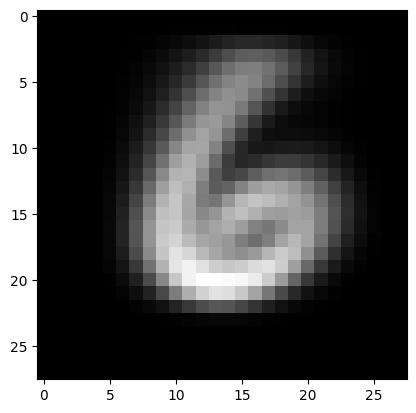

In [8]:
plt.imshow(np.reshape(c2, (28, 28)), cmap="gray")
plt.show()

In [9]:
c1.shape

(784,)

In [10]:
# X_1c = (X_1.T - c1).T
X_1c = X_1 - np.reshape(c1, (-1, 1)) # -1 is a wildcard
# X_2c = (X_2.T - c2).T
X_2c = X_2 - np.reshape(c2, (-1, 1))
# X_3c = (X_3.T - c3).T
X_3c = X_3 - np.reshape(c3, (-1, 1))

X_1c.shape

(784, 4132)

In [11]:
X_w = np.concatenate((X_1c, X_2c, X_3c), axis=1)

In [12]:
S_w = X_w @ X_w.T
S_w.shape

(784, 784)

In [13]:
X_bar1 = np.repeat(c1.reshape(-1, 1), X_1.shape[1], axis=1)
X_bar2 = np.repeat(c2.reshape(-1, 1), X_2.shape[1], axis=1)
X_bar3 = np.repeat(c3.reshape(-1, 1), X_3.shape[1], axis=1)

X_bar1.shape == X_1.shape

True

In [14]:
X_bar = np.concatenate((X_bar1, X_bar2, X_bar3), axis=1)
X_barc = X_bar - c.reshape((-1, 1))

In [15]:
S_b = X_barc @ X_barc.T
S_b.shape

(784, 784)

In [16]:
# Create a matrix to correct S_w to make it positive definite
eps = 1e-6
I_eps = np.eye(S_w.shape[0]) * eps
S_w = S_w + I_eps
I_eps.shape

(784, 784)

In [17]:
# Decomposition
L = np.linalg.cholesky(S_w)

In [18]:
L_inv = np.linalg.inv(L)
eig_val, W = scipy.sparse.linalg.eigs(L_inv @ S_b @ L, k=2)
W = np.real(W)
W.shape


(784, 2)

In [19]:
Q = L_inv.T @ W
Q.shape

# Q.T is the projection matrix of LDA
Z = Q.T @ X
Z.shape

(2, 12457)

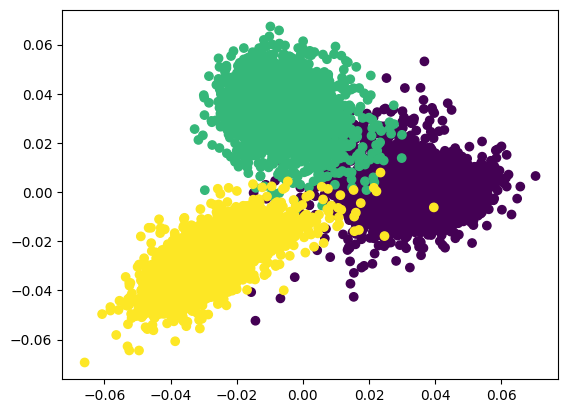

In [20]:
plt.scatter(Z[0], Z[1], c=Y)
plt.show()